<html>
    <body>
        <h1 align='center'>Cluster - K-means and Hierarchical Clustering Analysis</h1>
        <img src="https://40dgpnqigov4cd2ei1zwuj83-wpengine.netdna-ssl.com/wp-content/uploads/2018/05/29931-60863d06-fitMallMap-550x309.jpg" />
    </body>
</html>

In [147]:
import pandas as pd
import numpy as np
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

## 1. Data Descriptive Analysis

#### Q1.Amongst the variables of interest identify one that is categorical and one that is  quantitative and then provide the following descriptive deliverables: 

In [148]:
df = pd.read_csv('Mall_Customers.csv')

In [149]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Columns Description

* ColumnID - Unique ID assigned to the customer
* Gender - Gender of the Customer
* Age - Age of the Customer
* Annual Income - Annual Income of the Customer
* Spending Score- Score assigned by the mall based on customer behavior and spending nature

In [150]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


## Step 2 PCA Analysis

In [151]:
df=df_orig
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
dataset = StandardScaler().fit_transform(df)

In [153]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(dataset)

In [154]:
pca_df = pd.DataFrame(data=pca_fit,columns=["First_Components","Second_Components"])
pca_df.head(5)

,First_Components,Second_Components
0,-2.316965,-0.454190
1,-2.272391,-1.474104
2,-2.454223,-0.006922
3,-2.386461,-1.749935
4,-2.397377,-0.369341


In [155]:
pca.explained_variance_ratio_

array([0.39701894, 0.26948765])

In [156]:
pca = PCA().fit(df)

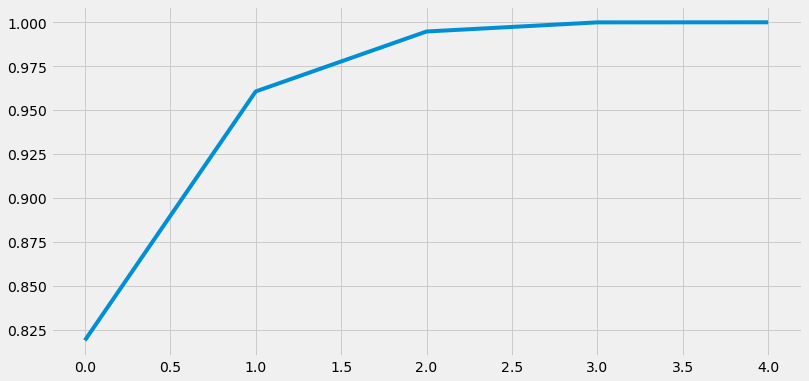

In [157]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

Two variables can explain around %95 of dataset.

## Step 3 Cluster Setup and Prelimiary Analysis

### Checking for null values

In [158]:
# checking if there is any NULL data

df.isnull().any().any()

False

Based on this, there are no null values

In [159]:
df.shape

(200, 5)

### Checking for Outliers

Text(0.5, 1.0, 'Distribution plot of Spending Score (1-100)')

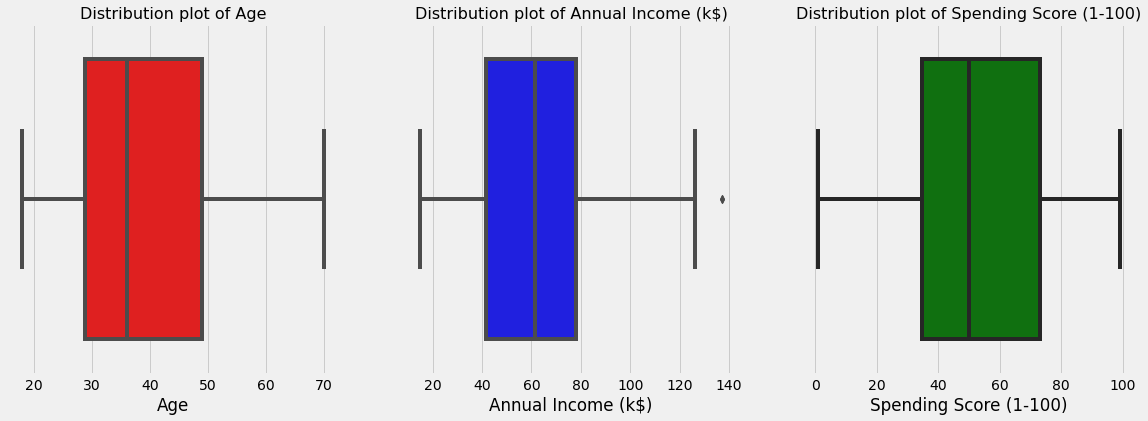

In [160]:
plt.rcParams['figure.figsize'] = (18,6)

plt.subplot(1,3,1)
sns.boxplot(df['Age'],color = 'red')
plt.title("Distribution plot of Age", fontsize=16)

plt.subplot(1,3,2)
sns.boxplot(df['Annual Income (k$)'], color='blue')
plt.title("Distribution plot of Annual Income (k$)", fontsize=16)

plt.subplot(1,3,3)
sns.boxplot(df['Spending Score (1-100)'], color='green')
plt.title("Distribution plot of Spending Score (1-100)", fontsize=16)


We see some outliers in Annual Income, for now, I'll proceed with the outlier data

### Feature Selection/Engineering

Text(0.5, 1.0, 'Distribution plot of Spending Score (1-100)')

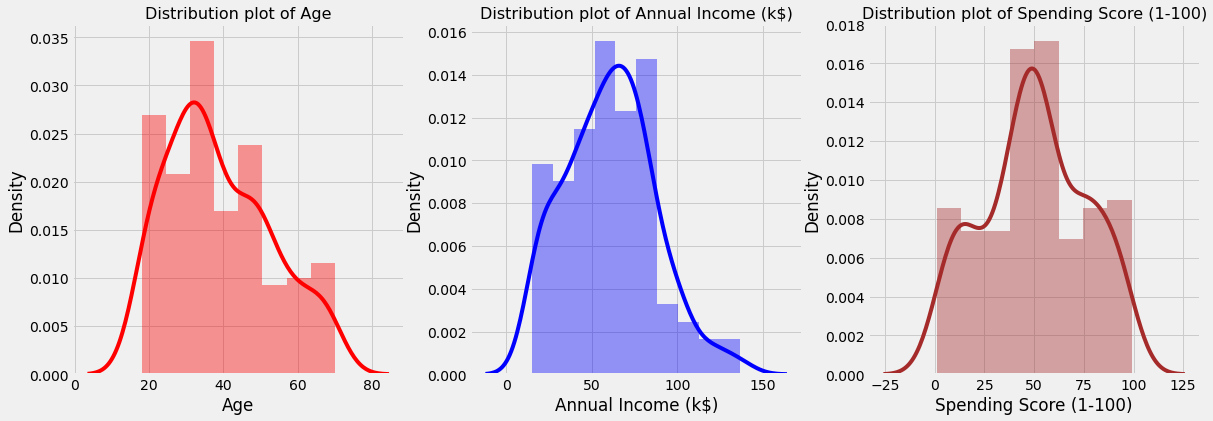

In [161]:
plt.rcParams['figure.figsize'] = (18,6)

#Creating distribution for all the numerical variables at a single place using subplots
plt.subplot(1,3,1)
sns.distplot(df['Age'],color = 'red')
plt.title("Distribution plot of Age", fontsize=16)

plt.subplot(1,3,2)
sns.distplot(df['Annual Income (k$)'], color='blue')
plt.title("Distribution plot of Annual Income (k$)", fontsize=16)

plt.subplot(1,3,3)
sns.distplot(df['Spending Score (1-100)'], color='brown')
plt.title("Distribution plot of Spending Score (1-100)", fontsize=16)

We can infer the following from the distribution plots:-

* Maximum number of visitors visiting the mall lie in the age group of 20-50 with some variation in between.
* Most of the people visiting mall have the annual income between around 35-90k dollars.
* Most of the people visiting mall have the spending score around 40-70.

Text(0.5, 1.0, 'CountPlot of Age')

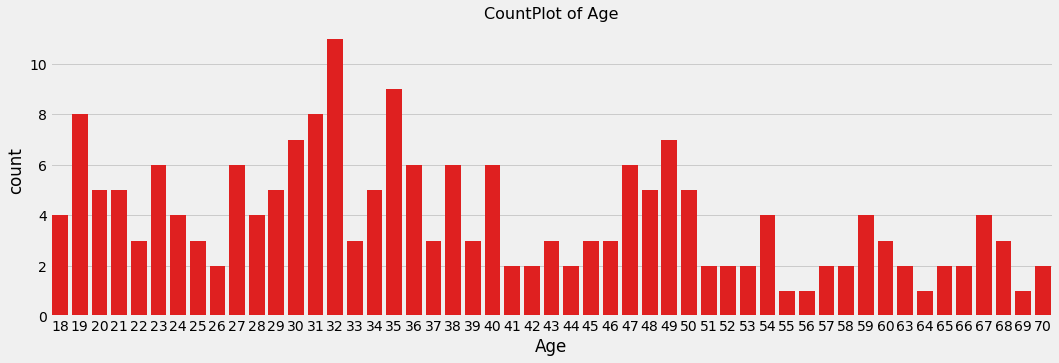

In [162]:
plt.rcParams['figure.figsize'] = (16,5)

#Countplot of Age Variable
sns.countplot(df['Age'], color='red')
plt.title("CountPlot of Age", fontsize=16)

There is quite variation in the age of the people visiting the mall.

People of age greater than 50 visit mall lesser than other age group of people.

People below 18 do not visit the mall.

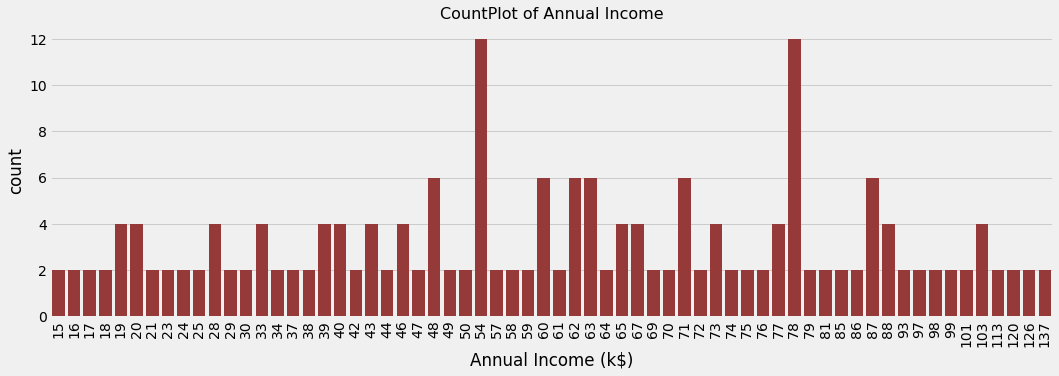

In [163]:
plt.rcParams['figure.figsize'] = (16,5)

#Countplot of Annual Income
sns.countplot(df['Annual Income (k$)'], color='brown')
plt.title("CountPlot of Annual Income", fontsize=16)

plt.xticks(rotation=90)
plt.show()

It is surprising to know that the maximum annual income of people visiting the mall is 54k or 78k dollars.

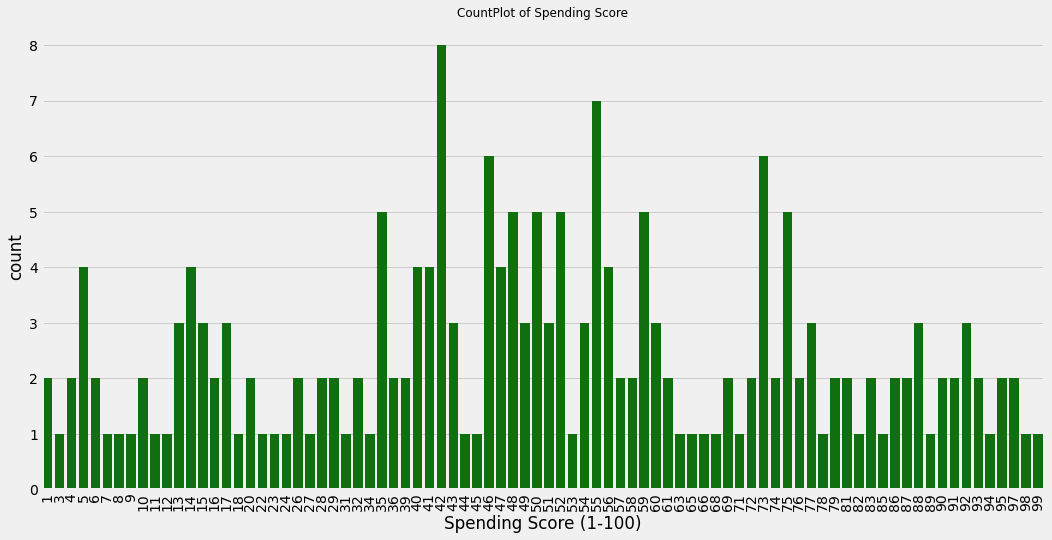

In [164]:
plt.rcParams['figure.figsize'] = (16,8)

#Countplot of Spending Score
sns.countplot(df['Spending Score (1-100)'], color='green')
plt.title("CountPlot of Spending Score", fontsize=12)

plt.xticks(rotation=90)
plt.show()

Maximum people have spending score around 35-75.

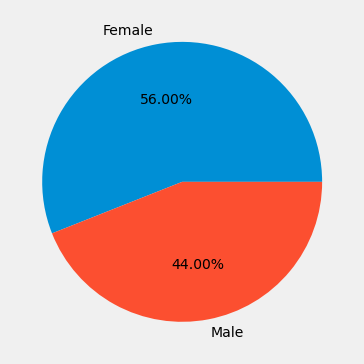

In [165]:
plt.rcParams['figure.figsize'] = (12,6)

plt.pie(df['Gender'].value_counts(), labels = ['Female','Male'],autopct = '%.2f%%')
plt.show()

Females are more in number than males visiting the mall.

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

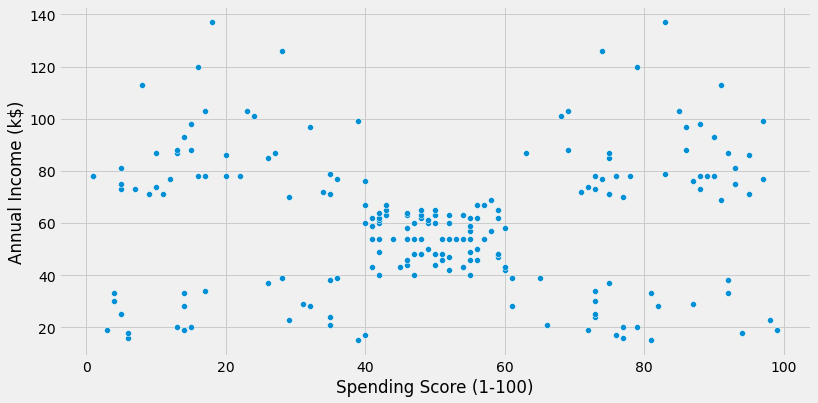

In [166]:
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=df)

We see some clustering forming between Annual Income and Spending Score.

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

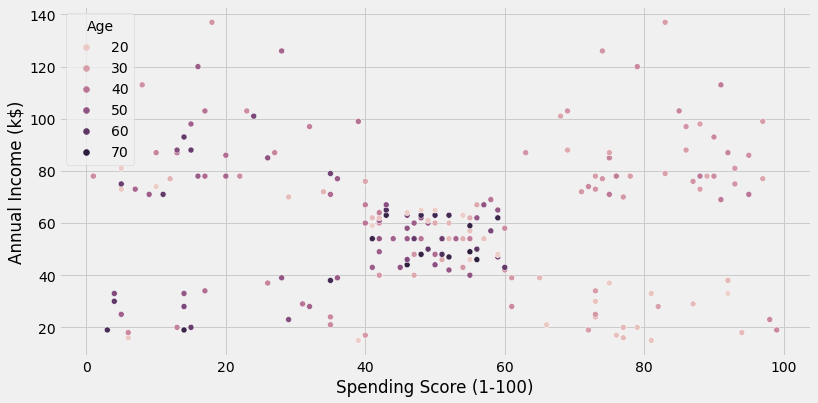

In [167]:
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)',hue='Age', data=df)

Age doesn't seems to be invovled in any clustering

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

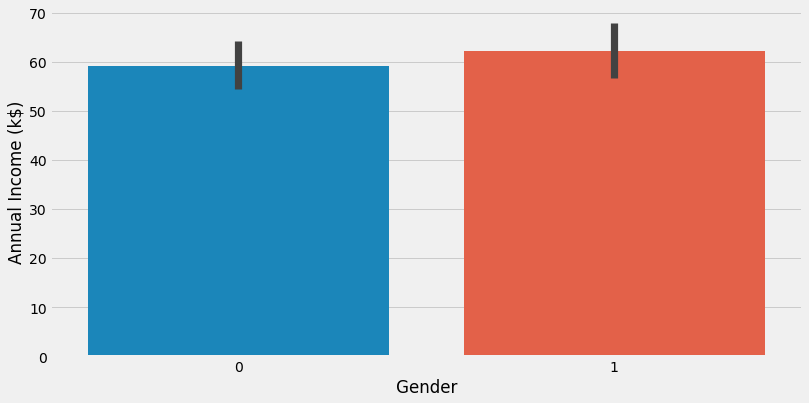

In [168]:
sns.barplot(df['Gender'], df['Annual Income (k$)'])

There is no relationship between the Annual Income and the Gender of the person. Both male and female have almost same annual income.

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

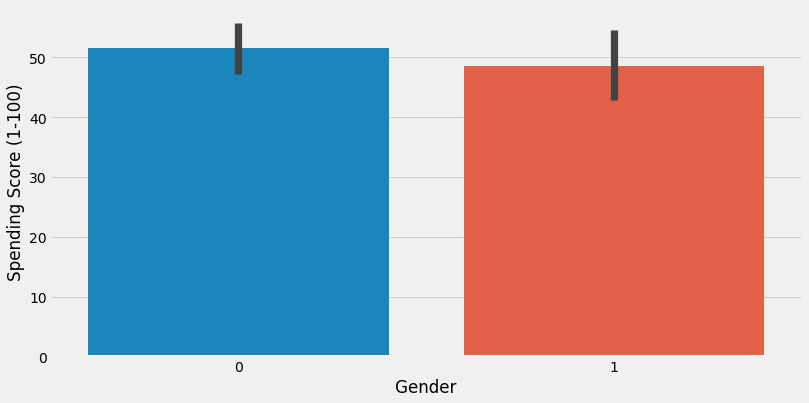

In [169]:
sns.barplot(df['Gender'], df['Spending Score (1-100)'])

Spending Score of Females is slightly higher than the spending score of Males.

<AxesSubplot:>

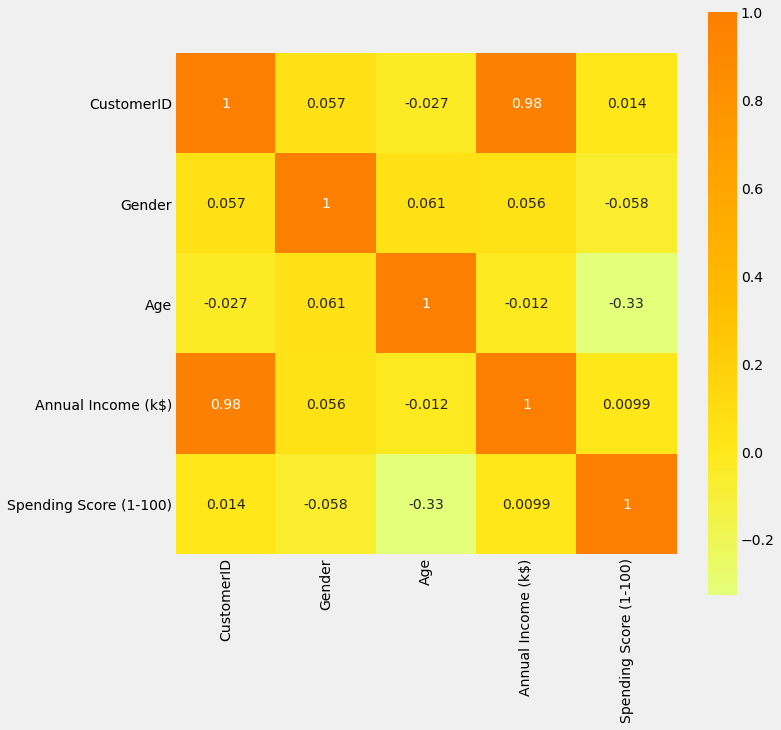

In [170]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='Wistia')

The heatmap between the different columns of this dataset reflects the most correlated features with Orange Color and least correlated features with yellow color.

We can clearly see that these attributes do not have good correlation among them, that's why we will proceed with all of the features.

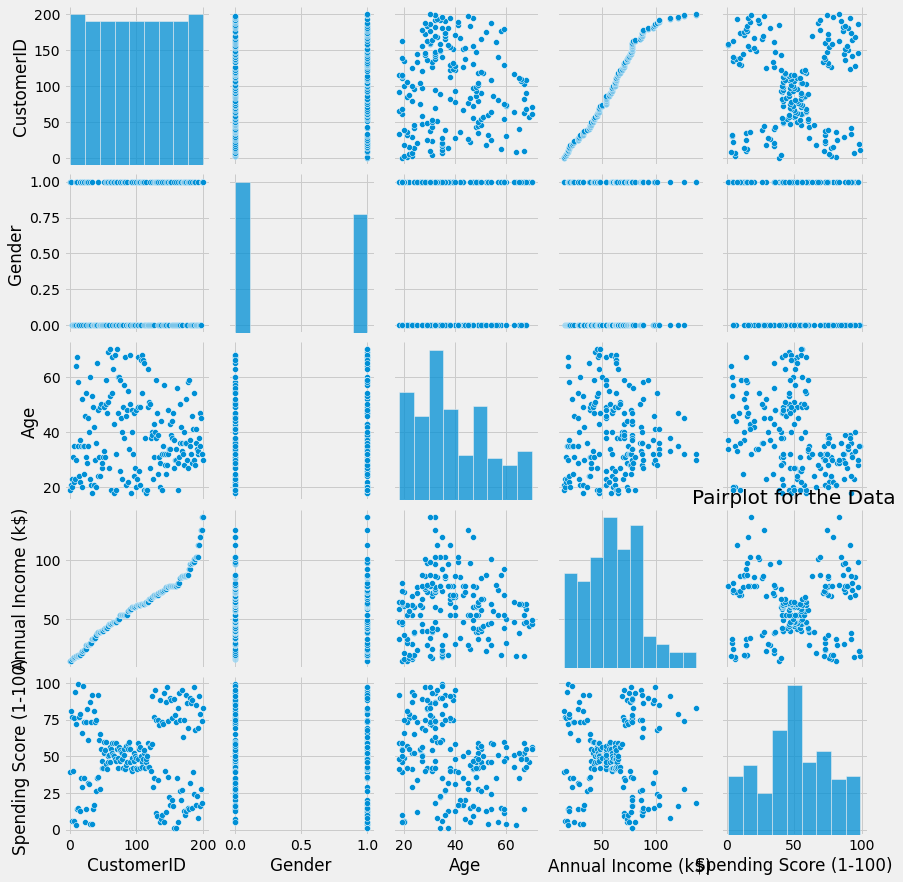

In [171]:
sns.pairplot(df)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

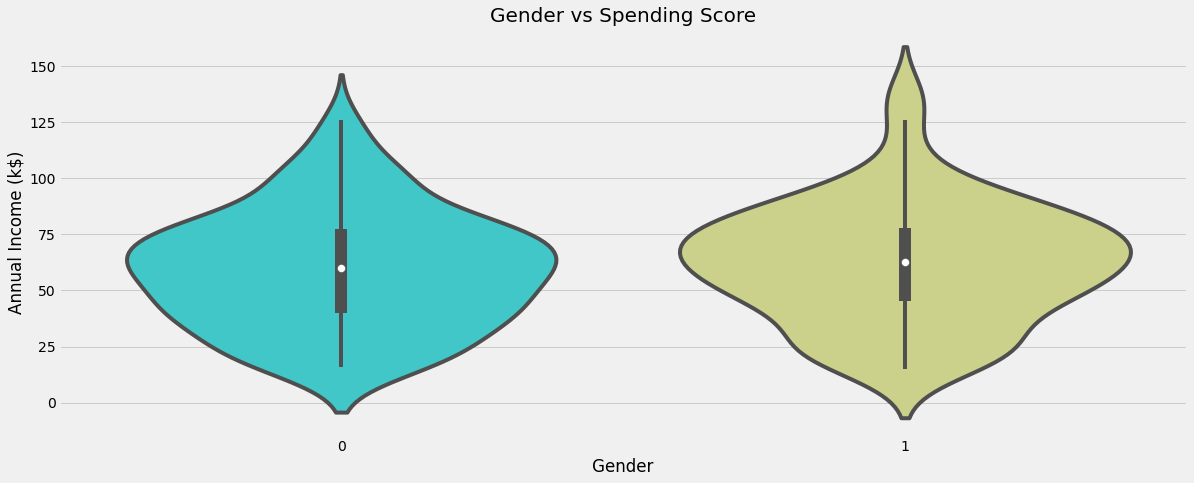

In [172]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(df['Gender'], df['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

There are more number of males who get paid more than females. But, The number of males and females are equal in number when it comes to low annual income.

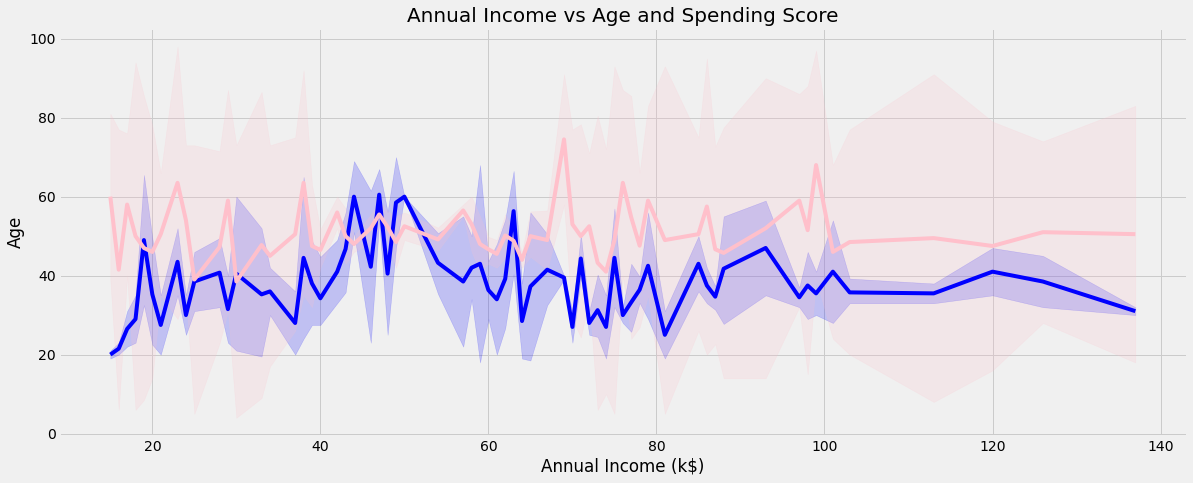

In [173]:
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

<quote>The above Plot Between Annual Income and Age represented by a blue color line, and a plot between Annual Income and the Spending Score represented by a pink color. shows how Age and Spending Varies with Annual Income.</quote>

## Step 4 Implement ClusterAnalysis: k-means and Hierarchical

In [174]:
x = df.iloc[:, [3, 4]].values

# let's check the shape of x
print(x.shape)

(200, 2)


### K-Means Clustering

#### Objective and rationale of using the specific algorithm to achieve the objective.

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. I'll use the KMeans clustering to find if this data set can be segmented by 

* Annual Income and Spending Score
* Age and Spending Score

First I'll use the Elbow Method to find the no of clusters.

#### Steps of implementing the algorithm with regards to the context. Create relevantgraphs.

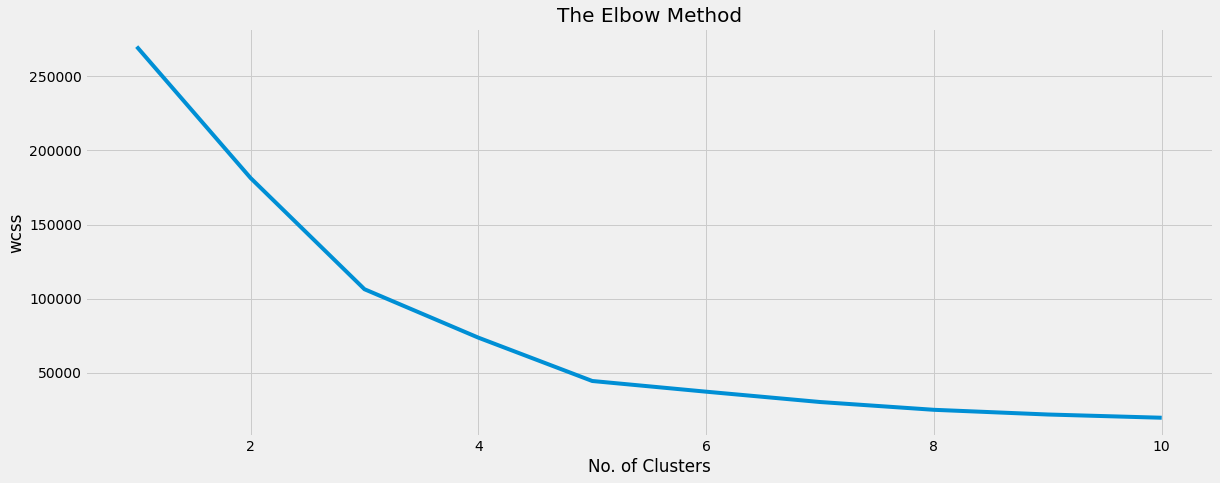

In [175]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

From the Elbow method, we can observe that the optimal number of clusters are 5. After 5 there is no significant difference in the Sum of Square of differences.

I'll try to cluster based on Annual Income and Spending Score, by categorizing them as 
* <code>cluster0</code>
* <code>cluster1</code>
* <code>cluster2</code>
* <code>cluster3</code>
* <code>cluster4</code>

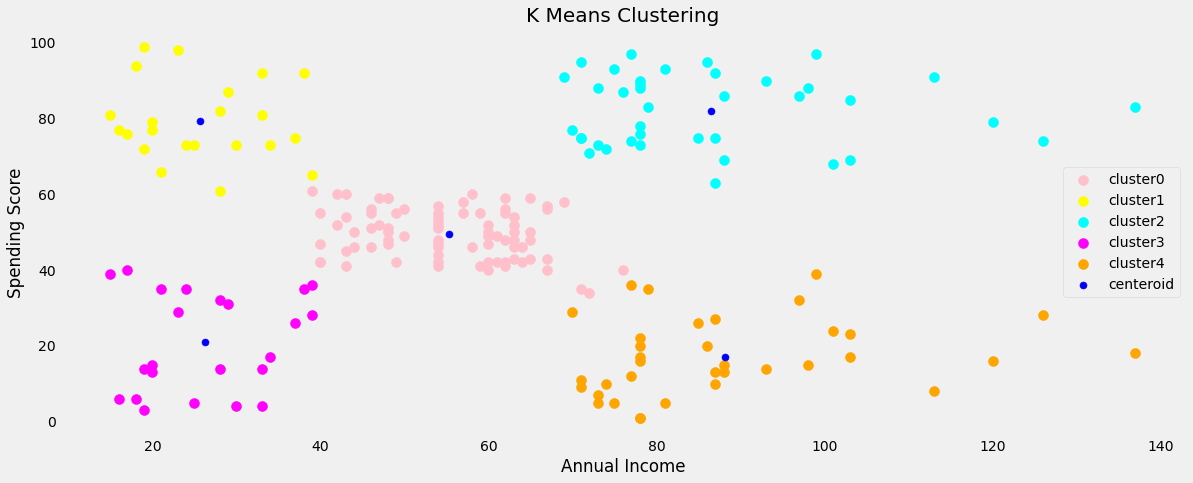

In [176]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'cluster0')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'cluster1')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'cluster2')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'cluster3')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'cluster4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

#### Interpretation of the results.

##### This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. 


* In cluster 0(pink colored) we see that people have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.


* In cluster 1(yellow colored) we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.


* In cluster 2(cyan-colored) we see that people have high income and high spending scores, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.


* In cluster 3(magenta colored) we can see people have low annual income and low spending scores, this is quite reasonable as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The shops/mall will be least interested in people belonging to this cluster.


* In cluster 4(orange colored) we see that people have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.

### Hierarchical Clustering

#### Objective and rationale of using the specific algorithm to achieve the objective.

In hierarchical clustering we do not pre-define the number of clusters but we first visually describe the similarity and dissimilarity between different data points and then decide the appropriate number of clusters.

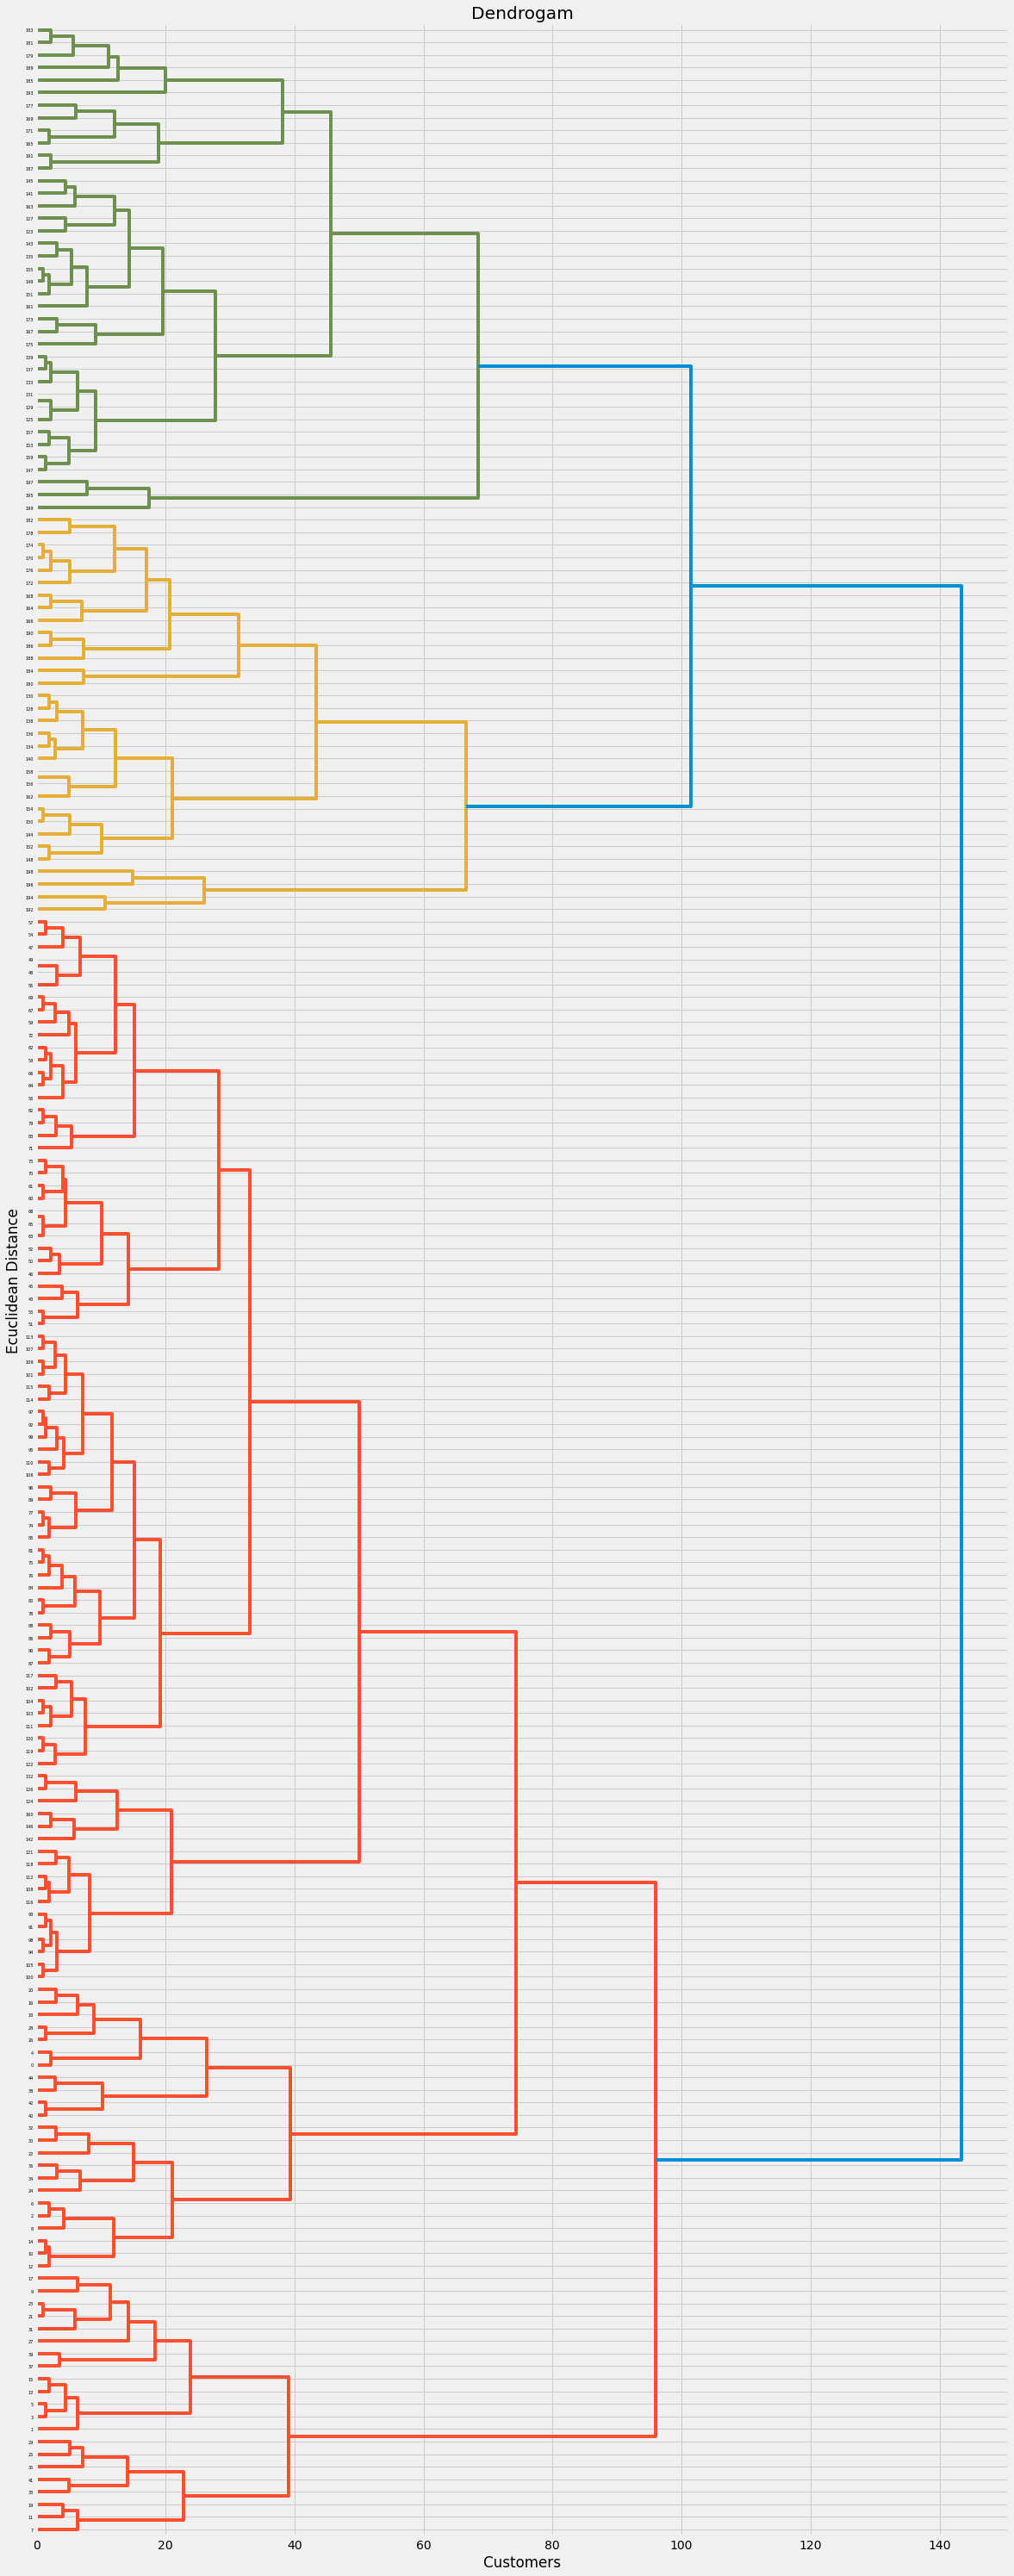

In [177]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(18, 50))
dendrogram = sch.dendrogram(sch.linkage(x, metric='euclidean', method="complete"),orientation='right')
plt.title('Dendrogam')
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

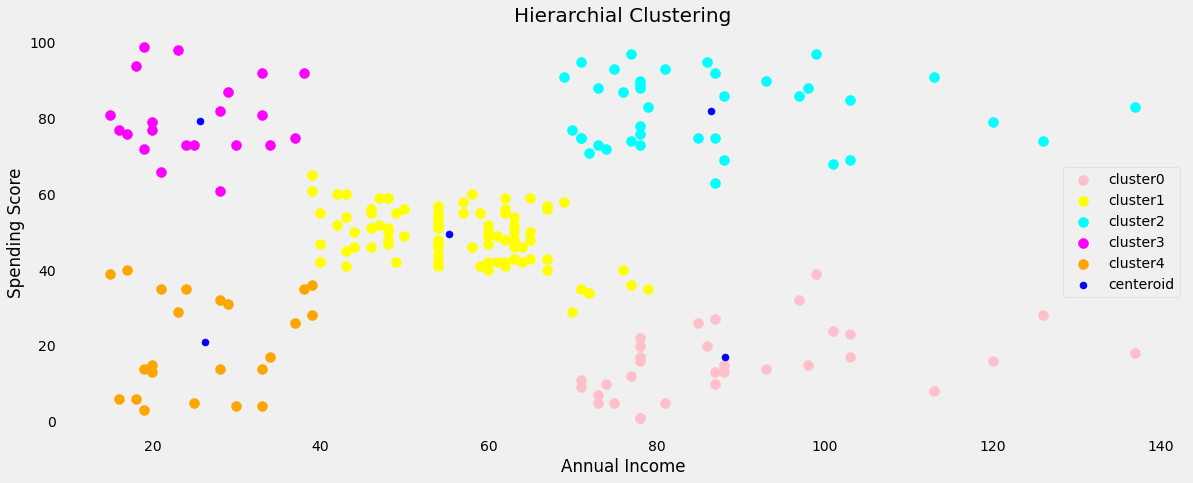

In [178]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'cluster0')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'cluster1')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'cluster2')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'cluster3')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'cluster4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

#### This clustering analysis produces similar result as k-means clustering 
##### We see strong clustering of data among the five clusters:

* cluster0 is customer with high incomes and very low spending scores

* cluster1 is moderate incomes and moderate spending scores

* cluster2 is high incomes and high spending scores

* cluster3 is low incomes and high spending scores

* cluster4 is low incomes and low spending scores

### Performance improvement techniques. Use feature selection, variable importance

#### Clustering based on Age and Annual Income

In [179]:
x = df.iloc[:, [2, 4]].values
x.shape

(200, 2)

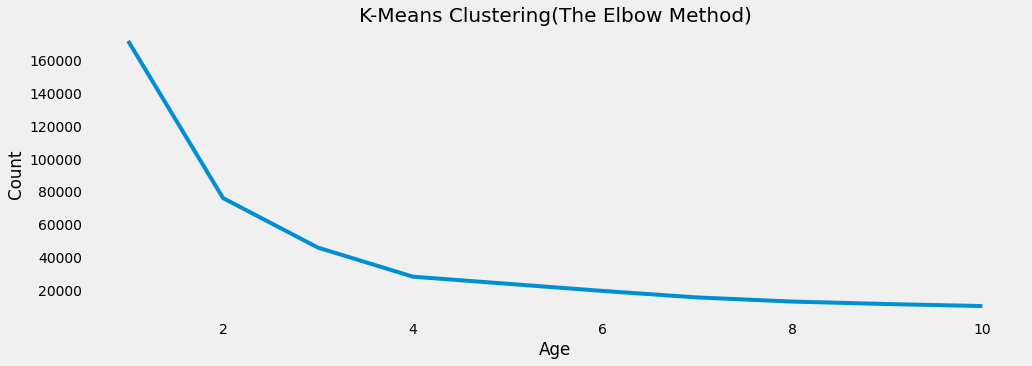

In [180]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

From the Elbow method, we can observe that the optimal number of clusters are 4. After 4 there is no significant difference in the Sum of Square of differences.

I'll try to cluster based on Annual Income and Spending Score, by categorizing them as

* `cluster0`
* `cluster1`
* `cluster2`
* `cluster3`

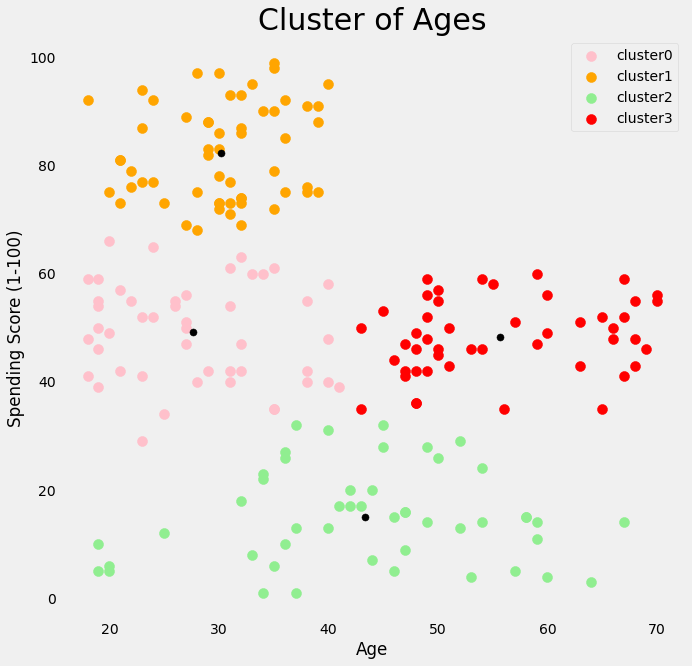

In [181]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'cluster0' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'cluster1')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'cluster2')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

Interpretation:

* cluster0 - These are people in age group 20-30 and they are average spenders


* cluster1 - These are people in age group 20-30 and they are high spenders


* cluster2 - These are people with a wide range 20-70 but there is still some small sub-cluster around 40-60, but they are mostly low spenders


* cluster3 - These are people in range 50-80 and they are too average spenders